# This is our final project, it will be divided into 3 sections representing the 3 datasets that we will be working with (2small & 1big dataset)

# Outline

What problem and data sets did you work on?
○ What are the important ideas/methods you explored?
○ What ideas from the class did you use?
○ Reporting the results (cross-validation, easy-to-read figures, etc)
○ Do the results make sense?
○ If you had much more time, how would you continue the project?



## What problem and data sets did you work on?

## What are the important ideas/methods you explored?

## What ideas from the class did you use?

## Reporting the results (cross-validation, easy-to-read figures, etc)

## Do the results make sense?

## If you had much more time, how would you continue the project?

# All libraries and functions needed to perform regression and classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.optimize as opt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))
    
def cost(theta, X, y):
    theta = np.matrix(theta) # make sure theta is a column or row vector! 
    X = np.matrix(X)
    y = np.matrix(y)
    out = sigmoid(X*theta.T)
    
    # first part of the cost function
    first = np.multiply(-y,np.log(out))
    
    # second part of cost function 
    second = np.multiply((1-y),np.log(1-out))
    return np.sum(first - second) / (len(X))

def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    # find each entry of the gradient vector
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term)
    
    return grad

## Dataset 1 (Small Dataset)

In [5]:
# SVM for dataset wine

from sklearn import svm
from sklearn.datasets import load_wine
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# features, target = load_wine(return_X_y=True)
data = load_wine()
#print(data)
df = pd.DataFrame(data=data['data'],columns=data['feature_names'])
df['target']=data['target']
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


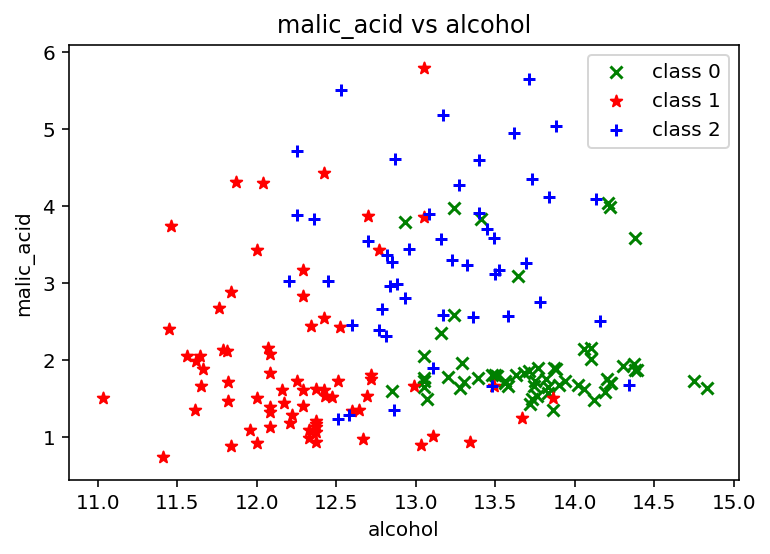

In [6]:

df['class']=df['target'].map(lambda ind: data['target_names'][ind])
x = df['alcohol']
y = df['malic_acid']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('malic_acid vs alcohol')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('malic_acid')
plt.show()

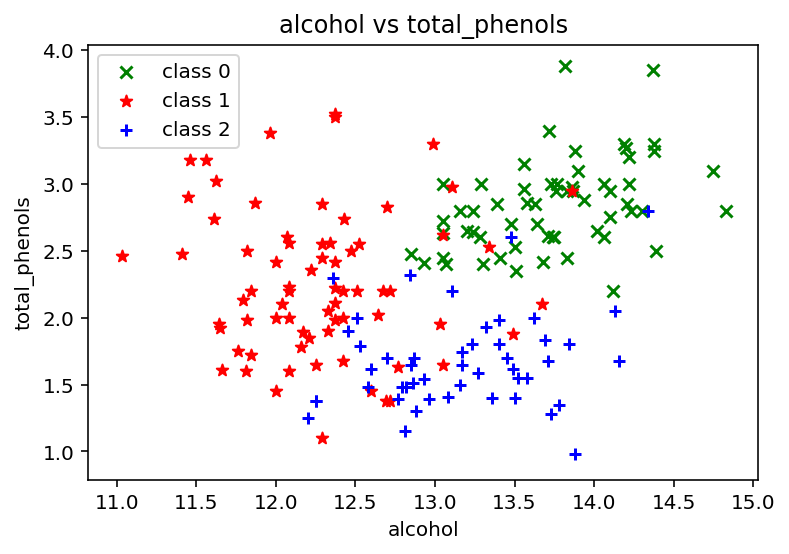

In [4]:

x = df['alcohol']
y = df['total_phenols']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('alcohol vs total_phenols')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.show()

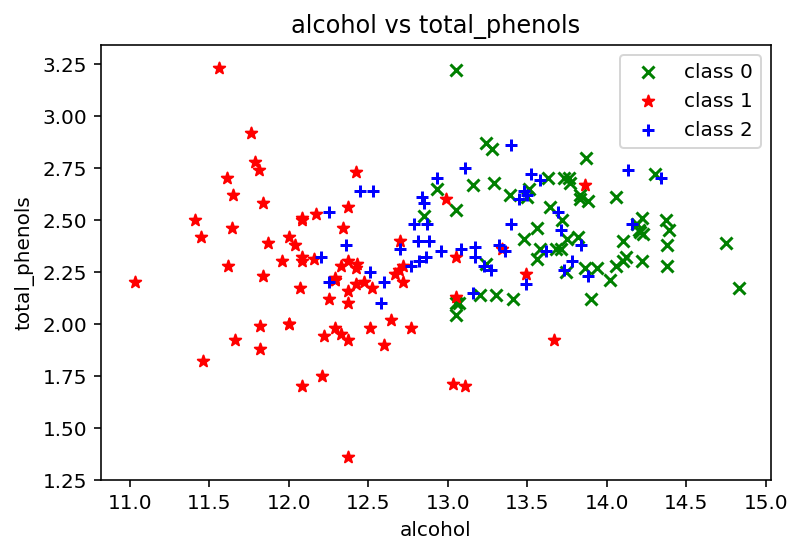

In [5]:
x = df['alcohol']
y = df['ash']

first_x = x[df['class'] == 'class_0']
first_y = y[df['class'] == 'class_0']

second_x = x[df['class'] == 'class_1']
second_y = y[df['class'] == 'class_1']

third_x = x[df['class'] == 'class_2']
third_y = y[df['class'] == 'class_2']

first = plt.scatter(first_x,first_y,marker='x',color='green')
second = plt.scatter(second_x,second_y,marker='*',color='red')
third = plt.scatter(third_x,third_y,marker='+',color='blue')
plt.title('alcohol vs total_phenols')
plt.legend((first, second, third), ('class 0', 'class 1', 'class 2'))
plt.xlabel('alcohol')
plt.ylabel('total_phenols')
plt.show()

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

target = df['class']
dropDf = df
dropDf = dropDf.drop(['class'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(dropDf, target, train_size=0.9)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

pca = PCA(n_components=2).fit(x_train)
pca_2d = pca.transform(x_train)

clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
svmClassifier_2d = clf.fit(x_train,y_train)

for i in range(0, pca_2d.shape[0]):
    if y_train[i] == 0:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',    s=50,marker='+')
    elif y_train[i] == 1:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',    s=50,marker='o')
    elif y_train[i] == 2:
        c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',    s=50,marker='*')

scaler = StandardScaler()
X_std = scaler.fit_transform(dropDf)
y_pred = clf.predict(x_test)
print(accuracy_score(y_test,y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


1.0


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [8]:
print(y_test[0:5])
print(y_pred[0:5])


['class_1' 'class_0' 'class_1' 'class_0' 'class_2']
['class_1' 'class_0' 'class_1' 'class_0' 'class_2']


## What are the important ideas/methods you explored?
#### Using svm to identify which class of wine each row of data is. 

## What ideas from the class did you use?
#### The way to approach setting up a jupyter notebook and the libraries that we should use.

## Do the results make sense?
## If you had much more time, how would you continue the project?

## Dataset 2 (Small Dataset)

We chose *nameofthedataset* for the second part

## Dataset 3 (Large Dataset)

We chose *nameofthedataset* for the third part